In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('Datasheets/hearing_test.csv')
df.head()

In [ ]:
df.shape
df.info()

In [ ]:
df.describe()

In [ ]:
df['test_result'].value_counts()

In [ ]:
sns.countplot(data=df,x='test_result',hue='test_result')

In [ ]:
sns.boxplot(data=df,x='test_result', y='age',hue='test_result')

In [ ]:
# sns.scatterplot(x='age')

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.scatterplot(data=df,x='physical_score',y='test_result')

In [ ]:
X=df.drop('test_result', axis=1)
y=df['test_result']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
scaler=MinMaxScaler()

scaled_X_train=scaler.fit_transform(X_train)
scaled_X_train

array([[0.26086957, 0.806     ],
       [0.53623188, 0.656     ],
       [0.43478261, 0.556     ],
       ...,
       [0.73913043, 0.368     ],
       [0.24637681, 0.778     ],
       [0.50724638, 0.716     ]], shape=(4000, 2))

In [55]:
scaled_X_test=scaler.fit_transform(X_test)

In [50]:
model=LogisticRegression()
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [52]:
model.score(scaled_X_train,y_train)

0.9225

In [54]:
model.predict([[77,21]])

array([0])

In [56]:
y_pred=model.predict(scaled_X_test)

In [58]:
model_confusion_matrix=confusion_matrix(y_pred,y_test)
model_confusion_matrix

array([[328,  59],
       [ 56, 557]])

<Axes: >

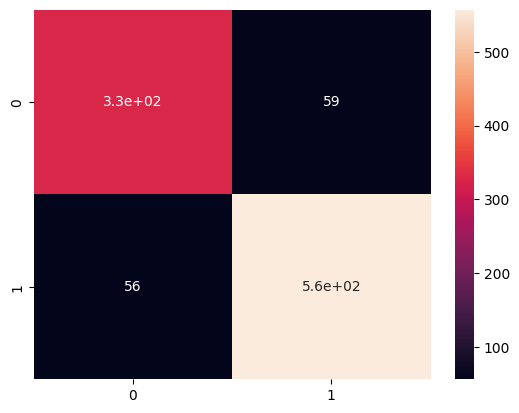

In [59]:
sns.heatmap(data=model_confusion_matrix,annot=True)